In [1]:
import random
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs, make_moons
from matplotlib.animation import FuncAnimation, PillowWriter
from sklearn.neighbors import NearestNeighbors
from sklearn.utils import shuffle

%matplotlib inline

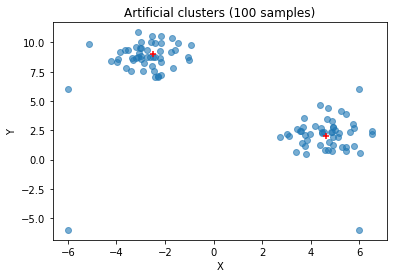

In [2]:
random.seed(42)
total_samples = 100

# This create some artifical clusters with standard dev. = 2
X, _, centers = make_blobs(n_samples=total_samples, 
                           centers=2, 
                           cluster_std=1,
                           n_features=2,
                           return_centers=True, 
                           random_state=42)
#center_box=(0,0),

# Adding outliers
X = np.append(X, [[6, 6], [-6, -6], [6, -6], [-6, 6]], axis=0)

# Shuffle
X = shuffle(X)

# Plot
plt.scatter(X[:,0], X[:,1], alpha=0.6)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Artificial clusters (%s samples)" % total_samples)

for c in centers:
    plt.scatter(c[0], c[1], marker="+", color="red")

In [3]:
from sklearn.neighbors import NearestNeighbors

# Get k-NN and distances
k = 1;
nbrs = NearestNeighbors(n_neighbors=k+1, algorithm='ball_tree').fit(X)
distances, indices = nbrs.kneighbors(X)

threshold = 2
labels = []

for i in range(0,len(distances)):
    NN_tr = indices[i,k]
    if((distances[i,k]/distances[NN_tr,k]) <= threshold):
        labels.append("green")
    else:
        labels.append("red")

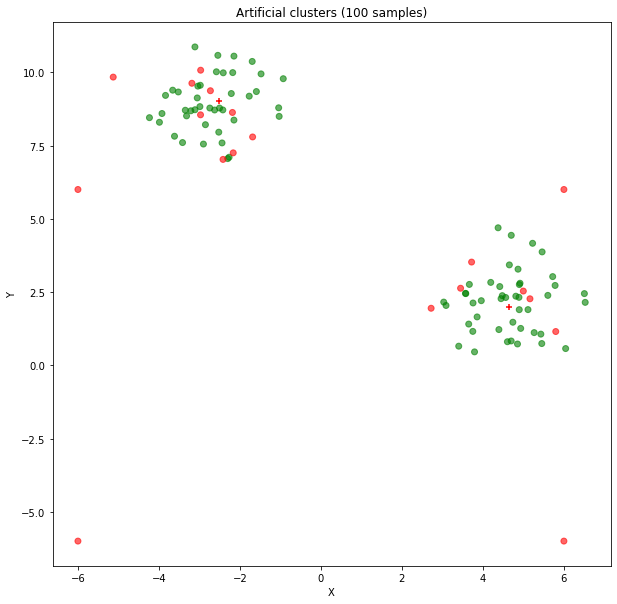

In [4]:
# Function for label
label_name = lambda x: "accepted" if x=="green" else "refused"

# Plot the data by using the labels as color
fig, ax = plt.subplots(figsize=(10,10))
plt.scatter(X[:,0], X[:,1], c=labels, alpha=0.6)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Artificial clusters (%s samples)" % total_samples)

for c in centers:
    plt.scatter(c[0], c[1], marker="+", color="red", label="center")

In [5]:
# Performance
Accepted_Rate = labels.count("green")/len(labels)
print("Accepted Rate is %.1f %%" % (Accepted_Rate*100))

Accepted Rate is 81.7 %


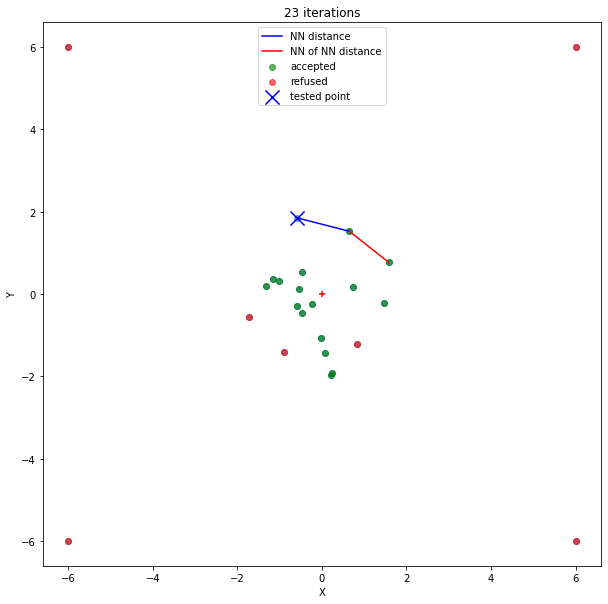

In [6]:
fig, ax = plt.subplots(figsize=(10,10))

random.seed(42)
total_samples = 20

# This create some artifical clusters with standard dev. = 2
X, _, centers = make_blobs(n_samples=total_samples, 
                           centers=1, 
                           cluster_std=1,
                           n_features=2,
                           center_box=(0,0),
                           return_centers=True, 
                           random_state=42)

# Adding outliers
X = np.append(X, [[6, 6], [-6, -6], [6, -6], [-6, 6]], axis=0)

# Shuffle
X = shuffle(X)

# Model parameters
k = 1
threshold = 2

# Classification
nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(X)
distances, indices = nbrs.kneighbors(X)

# Update frame callback 
def update(max_iter):
    
    # Clean the plot
    plt.clf()
    plt.cla()
    
    plt.scatter(X[:,0], X[:,1], alpha=0.6)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("Artificial clusters (%s samples)" % total_samples)
    
    for c in centers:
        plt.scatter(c[0], c[1], marker="+", color="red")
        plt.title("%s iterations" % max_iter)
    
    for i in range(0,max_iter+1):
        
        NN_tr = indices[i,k]
        NN_tr_2 = indices[NN_tr,k]
        
        if((distances[i,k]/distances[NN_tr,k]) <= threshold):
            label = "green"
        else:
            label = "red"
        
        if(i==max_iter):
            plt.scatter(X[i,0], X[i,1], marker="x", color="blue", s=200, label="tested point")
            plt.plot([X[i,0],X[NN_tr,0]], [X[i,1],X[NN_tr,1]], c="blue", label="NN distance")
            plt.plot([X[NN_tr,0],X[NN_tr_2,0]], [X[NN_tr,1],X[NN_tr_2,1]], c="red", label="NN of NN distance")
            #plt.scatter(X[i,0], X[i,1], c=label, alpha=0.6)
        else:
            plt.scatter(X[i,0], X[i,1], c=label, alpha=0.6, label=label_name(label))
        
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(), loc='upper center')

# Animate 1 frame per second
anim = FuncAnimation(fig, update, frames=np.arange(0, len(X[:,0])), interval=200)

# Save the gif
anim.save('outliers_detection.gif', writer=PillowWriter(fps=1), dpi=80)

Text(0.5, 1.0, 'Artificial clusters (100 samples)')

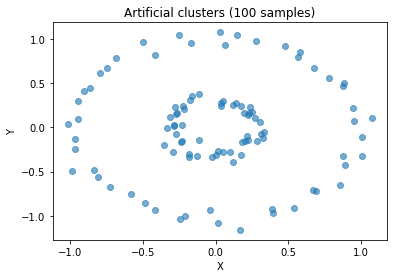

In [7]:
from sklearn.datasets import make_circles

total_samples = 100
np.random.seed(0)

X, y = make_circles(n_samples=total_samples, factor=.3, noise=.05)

plt.scatter(X[:,0], X[:,1], alpha=0.6)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Artificial clusters (%s samples)" % total_samples)

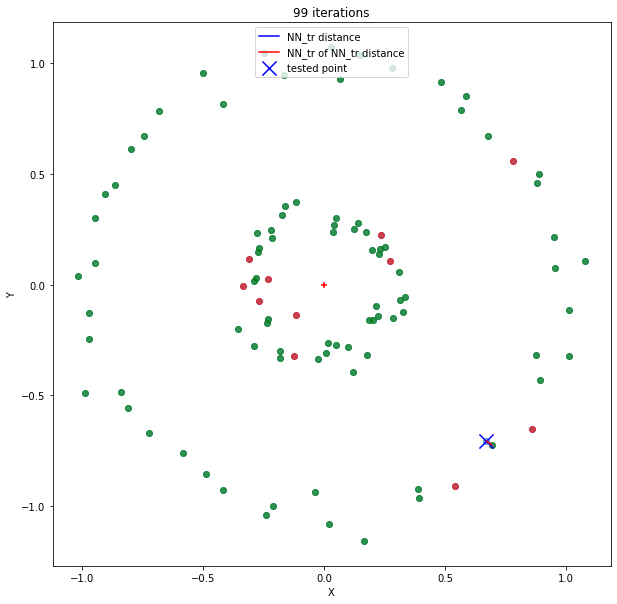

In [9]:
fig, ax = plt.subplots(figsize=(10,10))

# Model parameters
k = 1
threshold = 2

# Classification
nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(X)
distances, indices = nbrs.kneighbors(X)

# Update frame callback 
def update(max_iter):
    
    # Clean the plot
    plt.clf()
    plt.cla()
    
    plt.scatter(X[:,0], X[:,1], alpha=0.6)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("Artificial clusters (%s samples)" % total_samples)
    
    for c in centers:
        plt.scatter(c[0], c[1], marker="+", color="red")
        plt.title("%s iterations" % max_iter)
    
    for i in range(0,max_iter+1):
        
        NN_tr = indices[i,k]
        NN_tr_2 = indices[NN_tr,k]
        
        if((distances[i,k]/distances[NN_tr,k]) <= threshold):
            label = "green"
        else:
            label = "red"
        
        if(i==max_iter):
            plt.scatter(X[i,0], X[i,1], marker="x", color="blue", s=200, label="tested point")
            plt.plot([X[i,0],X[NN_tr,0]], [X[i,1],X[NN_tr,1]], c="blue", label="NN_tr distance")
            plt.plot([X[NN_tr,0],X[NN_tr_2,0]], [X[NN_tr,1],X[NN_tr_2,1]], c="red", label="NN_tr of NN_tr distance")
            #plt.scatter(X[i,0], X[i,1], c=label, alpha=0.6)
        else:
            plt.scatter(X[i,0], X[i,1], c=label, alpha=0.6)
        
    plt.legend(loc='upper center')

# Animate 1 frame per second
anim = FuncAnimation(fig, update, frames=np.arange(0, len(X[:,0])), interval=200)

# Save the gif
anim.save('outliers_detection_2.gif', writer=PillowWriter(fps=5), dpi=80)